<a href="https://colab.research.google.com/github/Trickshotblaster/smol-grad/blob/main/Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def g(x):
  return 3 * (x**2) + (2*x) - 3

In [4]:
g(3.0)

30.0

In [5]:
xs = np.arange(-5, 5, 0.25)
xs
ys = g(xs)
ys

array([62.    , 55.1875, 48.75  , 42.6875, 37.    , 31.6875, 26.75  ,
       22.1875, 18.    , 14.1875, 10.75  ,  7.6875,  5.    ,  2.6875,
        0.75  , -0.8125, -2.    , -2.8125, -3.25  , -3.3125, -3.    ,
       -2.3125, -1.25  ,  0.1875,  2.    ,  4.1875,  6.75  ,  9.6875,
       13.    , 16.6875, 20.75  , 25.1875, 30.    , 35.1875, 40.75  ,
       46.6875, 53.    , 59.6875, 66.75  , 74.1875])

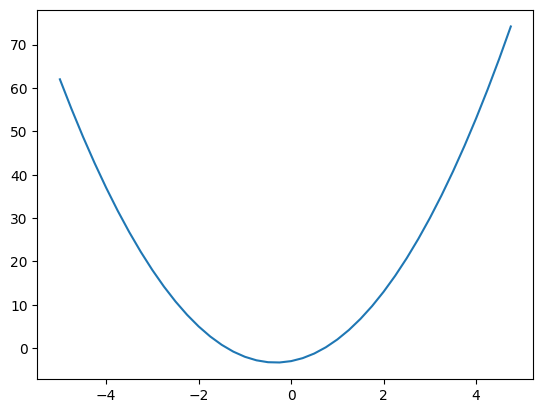

In [6]:
plt.plot(xs, ys)

In [7]:
h = 1e-10
x = -1/3
(g(x + h) - g(x))/h

0.0

In [8]:
a = 5.0
b = 2.0
c = 3.0
d = a*b + c
d

13.0

In [9]:
h = 1e-10

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
b += h
d2 = a*b + c

(d2 - d1)/h


2.000000165480742

In [80]:
class Value():
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label
  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), "*")
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x)+1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    return out

In [12]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
      if v not in nodes:
        nodes.add(v)
        for child in v._prev:
          edges.add((child, v))
          build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot



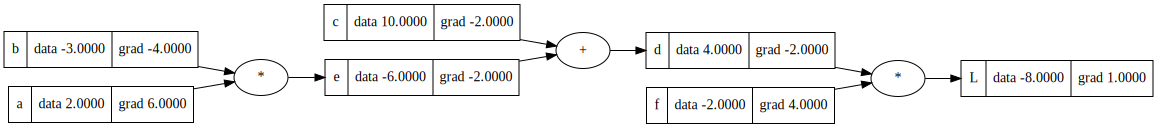

In [43]:
draw_dot(L)

In [40]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'

In [42]:
b.grad = -4.0
a.grad = 6.0
c.grad = -2.0
e.grad = -2.0
d.grad = -2.0
f.grad = 4.0
L.grad = 1.0

In [44]:
a.data += a.grad * 0.01
b.data += b.grad * 0.01
c.data += c.grad * 0.01
f.data += f.grad * 0.01

e = a*b
d = e + c
L = d * f

L

Value(data=-7.286496)

In [13]:
def lol():
  h = 1e-8

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e';
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2-L1)/h)

lol()

0.0


In [81]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights, x1 multiplied by w1, x2 by w2...
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias to add to the sum of weigted inputs
b = Value(6.8813735870195432, label='b')
# multiplying inputs by weights
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
# sum of weighted inputs
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
# adding bias
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

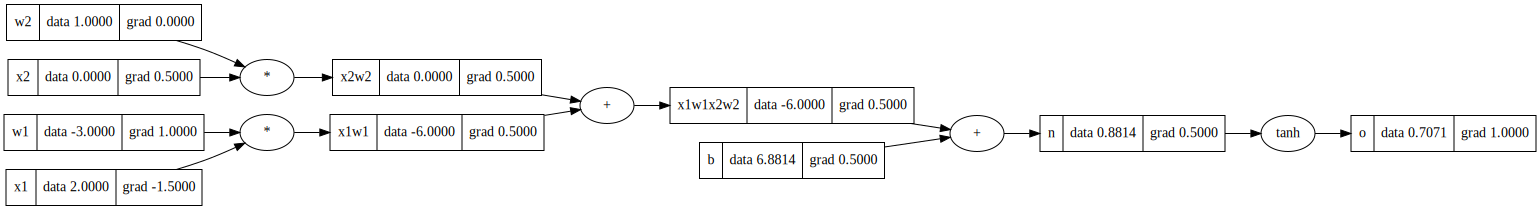

In [89]:
draw_dot(o)

In [88]:
o.grad = 1.0
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

In [78]:
o.grad = 1.0
n.grad = 0.5
x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x2.grad = 0.5
w2.grad = 0.0
x1.grad = -1.5
w1.grad = 1.0